In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)
print(online_retail.variables)

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining', 'aut

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [ ]:
X.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
!pip install pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=7f65a9e4050e3217eea15f0cb1bc82d3c042e2b35d5add203f257063ccbd91ca
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
spark = SparkSession.builder \
      .master("local[*]") \
      .appName("SPARK-TUT") \
      .getOrCreate()

In [ ]:
df_spark = spark.createDataFrame(X)

In [ ]:
df_spark = df_spark.na.drop(subset="Description")
df_spark.show()

+--------------------+--------+--------------+---------+----------+--------------+
|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+--------------------+--------+--------------+---------+----------+--------------+
|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|   17850.0|United Kingdom|
| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|   17850.0|United Kingdom|
|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|   17850.0|United Kingdom|
|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|   17850.0|United Kingdom|
|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|   17850.0|United Kingdom|
|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|   17850.0|United Kingdom|
|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.25|   17850.0|United Kingdom|
|HAND WARMER UNION...|       6|12/1/2010 8:28|     1.85|   17850.0|United Kingdom|
|HAND WARMER RED P...|       6|12/1/2010 8:28|     1.85|   17850.0|United Kingdom|
|ASS

In [ ]:
data_df = df_spark.select('Description')
data_df.show()

+--------------------+
|         Description|
+--------------------+
|WHITE HANGING HEA...|
| WHITE METAL LANTERN|
|CREAM CUPID HEART...|
|KNITTED UNION FLA...|
|RED WOOLLY HOTTIE...|
|SET 7 BABUSHKA NE...|
|GLASS STAR FROSTE...|
|HAND WARMER UNION...|
|HAND WARMER RED P...|
|ASSORTED COLOUR B...|
|POPPY'S PLAYHOUSE...|
|POPPY'S PLAYHOUSE...|
|FELTCRAFT PRINCES...|
|IVORY KNITTED MUG...|
|BOX OF 6 ASSORTED...|
|BOX OF VINTAGE JI...|
|BOX OF VINTAGE AL...|
|HOME BUILDING BLO...|
|LOVE BUILDING BLO...|
|RECIPE BOX WITH M...|
+--------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import lower
df_spark = df_spark.withColumn("Description", lower(df_spark["Description"]))

In [ ]:
df_spark.show()

+--------------------+--------+--------------+---------+----------+--------------+
|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+--------------------+--------+--------------+---------+----------+--------------+
|white hanging hea...|       6|12/1/2010 8:26|     2.55|   17850.0|United Kingdom|
| white metal lantern|       6|12/1/2010 8:26|     3.39|   17850.0|United Kingdom|
|cream cupid heart...|       8|12/1/2010 8:26|     2.75|   17850.0|United Kingdom|
|knitted union fla...|       6|12/1/2010 8:26|     3.39|   17850.0|United Kingdom|
|red woolly hottie...|       6|12/1/2010 8:26|     3.39|   17850.0|United Kingdom|
|set 7 babushka ne...|       2|12/1/2010 8:26|     7.65|   17850.0|United Kingdom|
|glass star froste...|       6|12/1/2010 8:26|     4.25|   17850.0|United Kingdom|
|hand warmer union...|       6|12/1/2010 8:28|     1.85|   17850.0|United Kingdom|
|hand warmer red p...|       6|12/1/2010 8:28|     1.85|   17850.0|United Kingdom|
|ass

In [ ]:
text_data = df_spark.select("Description")
from pyspark.ml.feature import Tokenizer

tokenizer = Tokenizer(inputCol="Description", outputCol="words")
tokenized_data = tokenizer.transform(text_data)
first_row = tokenized_data.head()
print(first_row)

Row(Description='white hanging heart t-light holder', words=['white', 'hanging', 'heart', 't-light', 'holder'])


In [ ]:
tokenized_data.show()

+--------------------+--------------------+
|         Description|               words|
+--------------------+--------------------+
|white hanging hea...|[white, hanging, ...|
| white metal lantern|[white, metal, la...|
|cream cupid heart...|[cream, cupid, he...|
|knitted union fla...|[knitted, union, ...|
|red woolly hottie...|[red, woolly, hot...|
|set 7 babushka ne...|[set, 7, babushka...|
|glass star froste...|[glass, star, fro...|
|hand warmer union...|[hand, warmer, un...|
|hand warmer red p...|[hand, warmer, re...|
|assorted colour b...|[assorted, colour...|
|poppy's playhouse...|[poppy's, playhou...|
|poppy's playhouse...|[poppy's, playhou...|
|feltcraft princes...|[feltcraft, princ...|
|ivory knitted mug...|[ivory, knitted, ...|
|box of 6 assorted...|[box, of, 6, asso...|
|box of vintage ji...|[box, of, vintage...|
|box of vintage al...|[box, of, vintage...|
|home building blo...|[home, building, ...|
|love building blo...|[love, building, ...|
|recipe box with m...|[recipe, b

In [ ]:
from pyspark.sql.functions import col
unique_products_count = df_spark.select(col("Description")).distinct().count()
print("Number of different unique products:", unique_products_count)

Number of different unique products: 4207


In [ ]:
from pyspark.sql.functions import sum

product_quantity_df = df_spark.groupBy("Description").agg(sum("Quantity").alias("TotalQuantity"))
product_quantity_ordered_df = product_quantity_df.orderBy("TotalQuantity", ascending=False)
product_quantity_ordered_df.show()

+--------------------+-------------+
|         Description|TotalQuantity|
+--------------------+-------------+
|world war 2 glide...|        53847|
|jumbo bag red ret...|        47363|
|assorted colour b...|        36381|
|      popcorn holder|        36334|
|pack of 72 retros...|        36039|
|white hanging hea...|        35317|
|  rabbit night light|        30680|
|mini paint set vi...|        26437|
|pack of 12 london...|        26315|
|pack of 60 pink p...|        24753|
|victorian glass h...|        23854|
|assorted colours ...|        23082|
| brocade ring purse |        23053|
|red  harmonica in...|        21866|
|jumbo bag pink po...|        21009|
|small popcorn holder|        20116|
|paper chain kit 5...|        18902|
|lunch bag red ret...|        18779|
|60 teatime fairy ...|        18040|
|       party bunting|        18022|
+--------------------+-------------+
only showing top 20 rows



In [ ]:
top_15_products = product_quantity_ordered_df.limit(15)

In [ ]:
top_15_products_pd = top_15_products.toPandas()

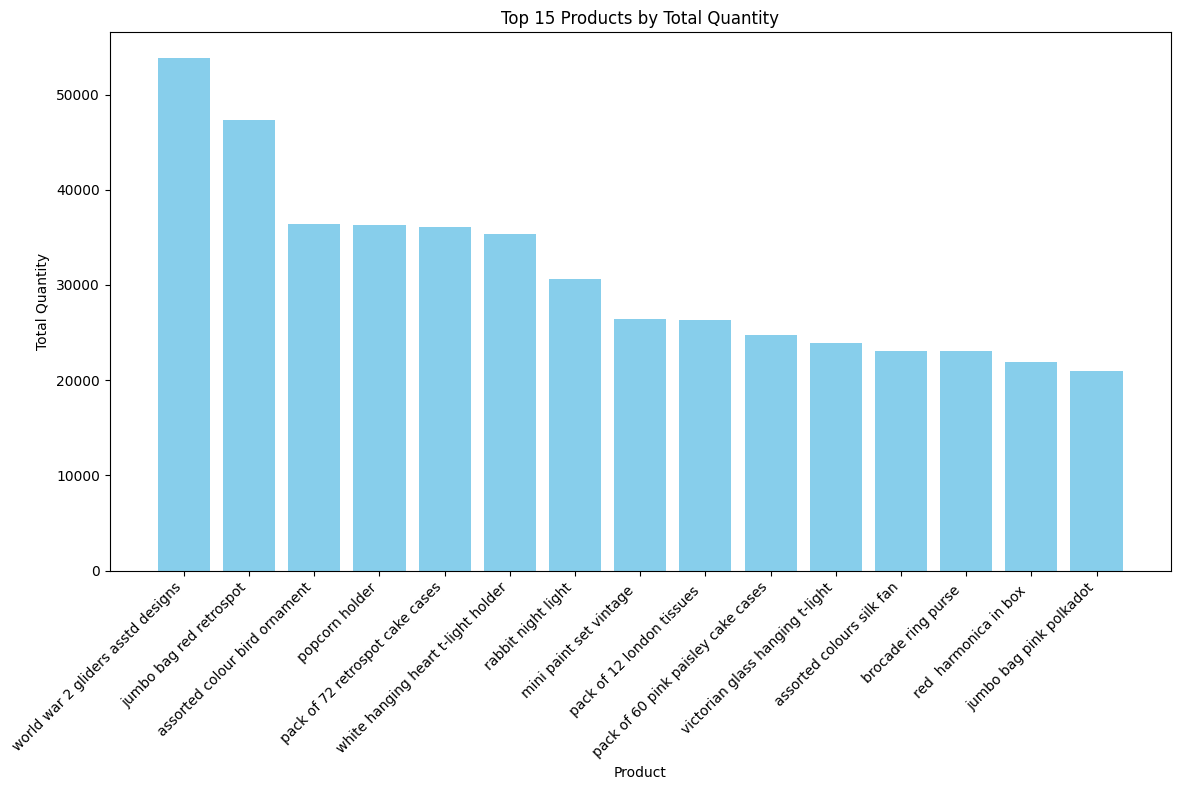

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.bar(top_15_products_pd["Description"], top_15_products_pd["TotalQuantity"], color='skyblue')
plt.xlabel("Product")
plt.ylabel("Total Quantity")
plt.title("Top 15 Products by Total Quantity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from pyspark.sql.functions import col
cust = df_spark.select(col("CustomerID")).distinct().count()
print("Number of Unique Customer:", cust)

Number of Unique Customer: 4373


In [ ]:
import pyspark.sql.functions as F
nan_count = df_spark.filter(F.isnan("CustomerID")).count()
print("Number of NaNs in ClientID column in df_spark:", nan_count)

Number of NaNs in ClientID column in df_spark: 135080


In [ ]:
df_spark = df_spark.dropna(subset=["CustomerID"])

from pyspark.sql.functions import col
cust = df_spark.select(col("CustomerID")).distinct().count()
print("Number of Unique Customer:", cust)

Number of Unique Customer: 4372


In [ ]:
import pyspark.sql.functions as F

df_spark = df_spark.withColumn("TotalPrice", F.col("Quantity") * F.col("UnitPrice"))
customer_total_payment = df_spark.groupBy("CustomerID").agg(F.sum("TotalPrice").alias("TotalPayment"))
customer_total_payment_ordered = customer_total_payment.orderBy("TotalPayment", ascending=False)
customer_total_payment_ordered.show()

+----------+------------------+
|CustomerID|      TotalPayment|
+----------+------------------+
|   14646.0| 279489.0199999992|
|   18102.0|256438.48999999993|
|   17450.0|187482.16999999998|
|   14911.0|132572.62000000002|
|   12415.0| 123725.4499999999|
|   14156.0|113384.14000000004|
|   17511.0| 88125.37999999996|
|   16684.0| 65892.07999999999|
|   13694.0|62653.100000000006|
|   15311.0|59419.340000000084|
|   13089.0| 57385.88000000011|
|   14096.0| 57120.90999999968|
|   15061.0| 54228.73999999999|
|   17949.0|52750.840000000004|
|   15769.0|          51823.72|
|   16029.0|50992.609999999964|
|   14298.0|  50862.4399999999|
|   14088.0| 50415.48999999999|
|   17841.0| 40340.78000000022|
|   13798.0|36351.419999999984|
+----------+------------------+
only showing top 20 rows



In [ ]:
customer_total_payment_ordered.count()

4372

In [ ]:
df_spark.createOrReplaceTempView("retail_data")

top_products_by_country = spark.sql("""
    SELECT Country, Description, COUNT(*) AS Count
    FROM retail_data
    GROUP BY Country, Description
    ORDER BY Country, Count DESC
""")

In [ ]:
top_products_by_country.count()

19370

In [ ]:
unique_countries = top_products_by_country.select("Country").distinct()
unique_countries.show()

+------------------+
|           Country|
+------------------+
|            Sweden|
|         Singapore|
|           Germany|
|               RSA|
|            France|
|            Greece|
|European Community|
|           Belgium|
|           Finland|
|             Malta|
|       Unspecified|
|             Italy|
|              EIRE|
|         Lithuania|
|            Norway|
|             Spain|
|           Denmark|
|            Israel|
|           Iceland|
|   Channel Islands|
+------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.window import Window
import pyspark.sql.functions as F

window_spec = Window.partitionBy("Country").orderBy(F.desc("Count"))
top_products_by_country_ranked = top_products_by_country.withColumn("Rank", F.rank().over(window_spec))

In [ ]:
top_1_product_by_country = top_products_by_country_ranked.filter(F.col("Rank") == 1)
top_1_product_by_country.show()

+---------+--------------------+-----+----+
|  Country|         Description|Count|Rank|
+---------+--------------------+-----+----+
|Australia|set of 3 cake tin...|   10|   1|
|  Austria|             postage|   14|   1|
|  Bahrain|novelty biscuits ...|    2|   1|
|  Belgium|             postage|   98|   1|
|   Brazil|recycled acapulco...|    1|   1|
|   Brazil|natural slate rec...|    1|   1|
|   Brazil|edwardian parasol...|    1|   1|
|   Brazil|small heart flowe...|    1|   1|
|   Brazil| spaceboy lunch box |    1|   1|
|   Brazil|green regency tea...|    1|   1|
|   Brazil|lunch bag spacebo...|    1|   1|
|   Brazil|recycled acapulco...|    1|   1|
|   Brazil|roses regency tea...|    1|   1|
|   Brazil|cook with wine me...|    1|   1|
|   Brazil|pink regency teac...|    1|   1|
|   Brazil|recycled acapulco...|    1|   1|
|   Brazil|set of 6 spice ti...|    1|   1|
|   Brazil|set of 4 pantry j...|    1|   1|
|   Brazil|    jam clock magnet|    1|   1|
|   Brazil|recycled acapulco...|

In [ ]:
top_10_countries = top_1_product_by_country.groupBy("Country").agg(F.sum("Count").alias("TotalCount")) \
                                            .orderBy(F.desc("TotalCount")).limit(10)

In [ ]:
top_10_countries.show()

+--------------------+----------+
|             Country|TotalCount|
+--------------------+----------+
|      United Kingdom|      1980|
|             Germany|       383|
|              France|       311|
|                EIRE|        99|
|             Belgium|        98|
|United Arab Emirates|        68|
|               Spain|        62|
|                 RSA|        58|
|             Lebanon|        45|
|             Finland|        41|
+--------------------+----------+



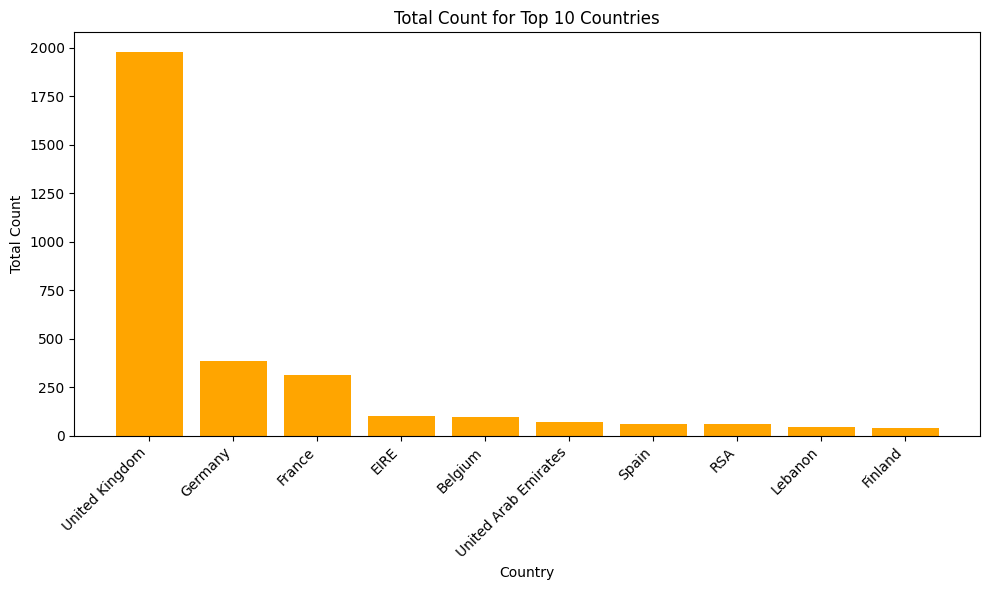

In [ ]:
import matplotlib.pyplot as plt

top_10_countries_pd = top_10_countries.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries_pd["Country"], top_10_countries_pd["TotalCount"], color='orange')
plt.xlabel("Country")
plt.ylabel("Total Count")
plt.title("Total Count for Top 10 Countries")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import date_format
spark = SparkSession.builder \
    .appName("DateTimeConversion") \
    .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
    .getOrCreate()
df_spark = df_spark.withColumn("InvoiceDate", F.to_timestamp("InvoiceDate", "MM/dd/yyyy HH:mm"))
df_spark = df_spark.withColumn("date", date_format("InvoiceDate", "MM/dd/yyyy")) \
                   .withColumn("month", date_format("InvoiceDate", "MMMM")) \
                   .withColumn("week", date_format("InvoiceDate", "EEEE")) \
                   .withColumn("time", date_format("InvoiceDate", "HH"))
df_spark.show()

+--------------------+--------+-------------------+---------+----------+--------------+------------------+----------+--------+---------+----+
|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|        TotalPrice|      date|   month|     week|time|
+--------------------+--------+-------------------+---------+----------+--------------+------------------+----------+--------+---------+----+
|white hanging hea...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|15.299999999999999|12/01/2010|December|Wednesday|  08|
| white metal lantern|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|             20.34|12/01/2010|December|Wednesday|  08|
|cream cupid heart...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|              22.0|12/01/2010|December|Wednesday|  08|
|knitted union fla...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|             20.34|12/01/2010|December|Wednesday|  08|
|red w

In [ ]:
sales_by_hour = df_spark.groupBy("time").agg(F.sum("TotalPrice").alias("TotalSales"))
sales_by_hour = sales_by_hour.orderBy("time")
sales_by_hour.show()

+----+------------------+
|time|        TotalSales|
+----+------------------+
|  06|-497.3499999999998|
|  07|31009.319999999985|
|  08|280103.26999999915|
|  09| 655114.8309999981|
|  10| 1150556.961000019|
|  11|1054638.9100000344|
|  12|  1337091.77000002|
|  13|1122675.4300000356|
|  14| 948603.8210000372|
|  15| 898958.8600000264|
|  16| 447390.8899999974|
|  17|212975.73099999907|
|  18|100734.56000000011|
|  19| 44688.44000000018|
|  20|16020.370000000014|
+----+------------------+



In [ ]:
negative_values_df = df_spark.filter((col("UnitPrice").contains("-")) | (col("Quantity").contains("-")))

In [ ]:
negative_values_df.show() #We can see that they are discounts and returns

+--------------------+--------+-------------------+---------+----------+--------------+-------------------+----------+--------+---------+----+
|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|         TotalPrice|      date|   month|     week|time|
+--------------------+--------+-------------------+---------+----------+--------------+-------------------+----------+--------+---------+----+
|            discount|      -1|2010-12-01 09:41:00|     27.5|   14527.0|United Kingdom|              -27.5|12/01/2010|December|Wednesday|  09|
|set of 3 coloured...|      -1|2010-12-01 09:49:00|     4.65|   15311.0|United Kingdom|              -4.65|12/01/2010|December|Wednesday|  09|
|plasters in tin c...|     -12|2010-12-01 10:24:00|     1.65|   17548.0|United Kingdom|-19.799999999999997|12/01/2010|December|Wednesday|  10|
|pack of 12 pink p...|     -24|2010-12-01 10:24:00|     0.29|   17548.0|United Kingdom| -6.959999999999999|12/01/2010|December|Wednesday|  10|

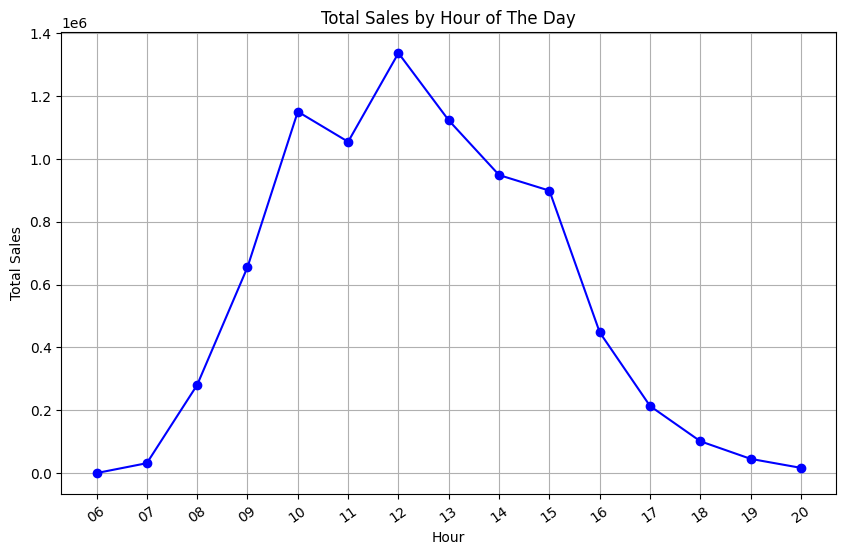

In [ ]:
import matplotlib.pyplot as plt
sales_by_hour_pd = sales_by_hour.toPandas()

plt.figure(figsize=(10, 6))
plt.plot(sales_by_hour_pd['time'], sales_by_hour_pd['TotalSales'], marker='o', color='b')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour of The Day')
plt.xticks(rotation=35)
plt.grid(True)
plt.show()

In [ ]:
def get_season(month):
    if month in ["December", "January", "February"]:
        return "Winter"
    elif month in ["March", "April", "May"]:
        return "Spring"
    elif month in ["June", "July", "August"]:
        return "Summer"
    else:
        return "Autumn"
get_season_udf = F.udf(get_season)

In [ ]:
df_spark = df_spark.withColumn("season", get_season_udf(df_spark["month"]))
sales_by_season = df_spark.groupBy("season").agg(F.sum("Quantity").alias("TotalSales"))

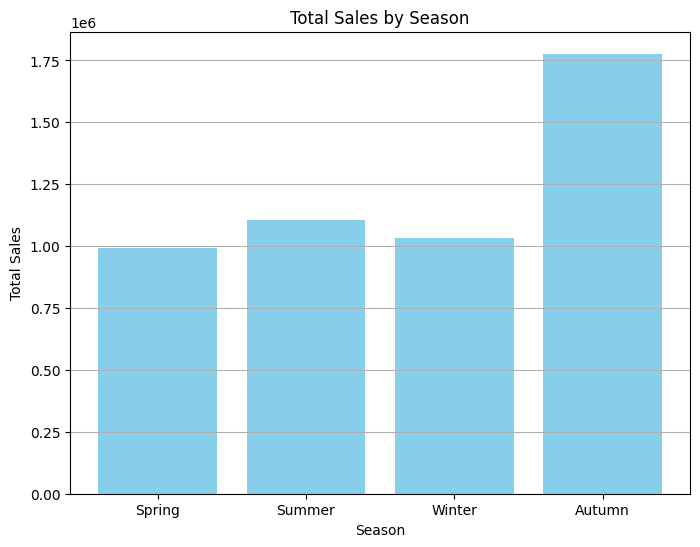

In [ ]:
import matplotlib.pyplot as plt
sales_by_season_pd = sales_by_season.toPandas()
plt.figure(figsize=(8, 6))
plt.bar(sales_by_season_pd['season'], sales_by_season_pd['TotalSales'], color='skyblue')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.title('Total Sales by Season')
plt.grid(axis='y')
plt.show()

In [ ]:
from pyspark.ml.feature import Tokenizer, HashingTF, IDF
from pyspark.ml.linalg import Vector

tokenizer = Tokenizer(inputCol="Description", outputCol="words")
wordsData = tokenizer.transform(df_spark)

In [ ]:
wordsData.show(5)

+--------------------+--------+-------------------+---------+----------+--------------+------------------+----------+--------+---------+----+------+--------------------+
|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|        TotalPrice|      date|   month|     week|time|season|               words|
+--------------------+--------+-------------------+---------+----------+--------------+------------------+----------+--------+---------+----+------+--------------------+
|white hanging hea...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|15.299999999999999|12/01/2010|December|Wednesday|  08|Winter|[white, hanging, ...|
| white metal lantern|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|             20.34|12/01/2010|December|Wednesday|  08|Winter|[white, metal, la...|
|cream cupid heart...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|              22.0|12/01/2010|December|Wednesday|  08|Winter|[c

In [ ]:
hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=10000)
featurizedData = hashingTF.transform(wordsData)

In [ ]:
featurizedData.select('rawFeatures').show(truncate=False)

+-----------------------------------------------------------------+
|rawFeatures                                                      |
+-----------------------------------------------------------------+
|(10000,[4618,4667,5843,8889,9808],[1.0,1.0,1.0,1.0,1.0])         |
|(10000,[426,671,5843],[1.0,1.0,1.0])                             |
|(10000,[477,6575,7369,7815,9002],[1.0,1.0,1.0,1.0,1.0])          |
|(10000,[2352,2589,3932,4508,6606,9693],[1.0,1.0,1.0,1.0,1.0,1.0])|
|(10000,[52,388,691,5843,9470],[1.0,1.0,1.0,1.0,1.0])             |
|(10000,[405,946,5015,5342,7153],[1.0,1.0,1.0,1.0,1.0])           |
|(10000,[4667,5170,6932,8819,8889],[1.0,1.0,1.0,1.0,1.0])         |
|(10000,[3423,4467,4508,8944],[1.0,1.0,1.0,1.0])                  |
|(10000,[52,3197,3423,8151,8944],[1.0,1.0,1.0,1.0,1.0])           |
|(10000,[2134,5894,8855,9363],[1.0,1.0,1.0,1.0])                  |
|(10000,[7058,7842,9737],[1.0,1.0,1.0])                           |
|(10000,[756,7058,9737],[1.0,1.0,1.0])          

In [ ]:
idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)


In [ ]:
rescaledData.show()

+--------------------+--------+-------------------+---------+----------+--------------+------------------+----------+--------+---------+----+------+--------------------+--------------------+--------------------+
|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|        TotalPrice|      date|   month|     week|time|season|               words|         rawFeatures|            features|
+--------------------+--------+-------------------+---------+----------+--------------+------------------+----------+--------+---------+----+------+--------------------+--------------------+--------------------+
|white hanging hea...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|15.299999999999999|12/01/2010|December|Wednesday|  08|Winter|[white, hanging, ...|(10000,[4618,4667...|(10000,[4618,4667...|
| white metal lantern|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|             20.34|12/01/2010|December|Wednesday|  08|Winter|[whi

In [ ]:
rescaledData.select('features').show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                               |
+-------------------------------------------------------------------------------------------------------------------------------------------------------+
|(10000,[4618,4667,5843,8889,9808],[3.426588933240004,3.563269627991808,3.2134949537670243,3.4452939103949065,2.625905253571504])                       |
|(10000,[426,671,5843],[3.2422020926170427,5.32479364005155,3.2134949537670243])                                                                        |
|(10000,[477,6575,7369,7815,9002],[5.7217138356497665,4.601563395430525,5.480122870398253,4.126642900013204,6.073467404511678])                         |
|(10000,[2352,2589,3932,4508,6606,9693],[6.759171701164545,3.976831946332591

In [ ]:
vectorized_df = rescaledData.select("features")
vectorized_df.show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                               |
+-------------------------------------------------------------------------------------------------------------------------------------------------------+
|(10000,[4618,4667,5843,8889,9808],[3.426588933240004,3.563269627991808,3.2134949537670243,3.4452939103949065,2.625905253571504])                       |
|(10000,[426,671,5843],[3.2422020926170427,5.32479364005155,3.2134949537670243])                                                                        |
|(10000,[477,6575,7369,7815,9002],[5.7217138356497665,4.601563395430525,5.480122870398253,4.126642900013204,6.073467404511678])                         |
|(10000,[2352,2589,3932,4508,6606,9693],[6.759171701164545,3.976831946332591

In [ ]:
df_spark.show()

+--------------------+--------+-------------------+---------+----------+--------------+------------------+----------+--------+---------+----+------+
|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|        TotalPrice|      date|   month|     week|time|season|
+--------------------+--------+-------------------+---------+----------+--------------+------------------+----------+--------+---------+----+------+
|white hanging hea...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|15.299999999999999|12/01/2010|December|Wednesday|  08|Winter|
| white metal lantern|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|             20.34|12/01/2010|December|Wednesday|  08|Winter|
|cream cupid heart...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|              22.0|12/01/2010|December|Wednesday|  08|Winter|
|knitted union fla...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|             20.34|

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.ml.feature import StringIndexer

df_spark = df_spark.withColumn("row_id", monotonically_increasing_id())
vectorized_df = vectorized_df.withColumn("row_id", monotonically_increasing_id())

joined_df = df_spark.join(vectorized_df.select("row_id", "features"), "row_id", "inner")

joined_df = joined_df.drop("row_id", "Description", "InvoiceDate", "date")

indexers = [
    StringIndexer(inputCol=column, outputCol=column+"_index").fit(joined_df)
    for column in ["Country", "month", "week", "season"]
]
for indexer in indexers:
    joined_df = indexer.transform(joined_df)
assembler = VectorAssembler(
    inputCols=["Quantity", "UnitPrice", "CustomerID", "TotalPrice", "time",
               "Country_index", "month_index", "week_index", "season_index", "features"],
    outputCol="features_combined"
)


In [ ]:
from pyspark.sql.functions import col

joined_df = joined_df.withColumn("time", col("time").cast("int"))

assembler = VectorAssembler(
    inputCols=["Quantity", "UnitPrice", "CustomerID", "TotalPrice", "time",
               "Country_index", "month_index", "week_index", "season_index", "features"],
    outputCol="features_combined"
)

output = assembler.transform(joined_df)
output.show()

+--------+---------+----------+--------------+------------------+--------+---------+----+------+--------------------+-------------+-----------+----------+------------+--------------------+
|Quantity|UnitPrice|CustomerID|       Country|        TotalPrice|   month|     week|time|season|            features|Country_index|month_index|week_index|season_index|   features_combined|
+--------+---------+----------+--------------+------------------+--------+---------+----+------+--------------------+-------------+-----------+----------+------------+--------------------+
|       6|     2.55|   17850.0|United Kingdom|15.299999999999999|December|Wednesday|   8|Winter|(10000,[4618,4667...|          0.0|        2.0|       1.0|         1.0|(10009,[0,1,2,3,4...|
|       6|     3.39|   17850.0|United Kingdom|             20.34|December|Wednesday|   8|Winter|(10000,[426,671,5...|          0.0|        2.0|       1.0|         1.0|(10009,[0,1,2,3,4...|
|       2|     7.65|   17850.0|United Kingdom|         

In [ ]:
output = output.drop("Country", "month", "week", "season", "features_combined")
output.show()

+--------+---------+----------+------------------+----+--------------------+-------------+-----------+----------+------------+
|Quantity|UnitPrice|CustomerID|        TotalPrice|time|            features|Country_index|month_index|week_index|season_index|
+--------+---------+----------+------------------+----+--------------------+-------------+-----------+----------+------------+
|       6|     2.55|   17850.0|15.299999999999999|   8|(10000,[4618,4667...|          0.0|        2.0|       1.0|         1.0|
|       6|     3.39|   17850.0|             20.34|   8|(10000,[426,671,5...|          0.0|        2.0|       1.0|         1.0|
|       2|     7.65|   17850.0|              15.3|   8|(10000,[405,946,5...|          0.0|        2.0|       1.0|         1.0|
|       6|     4.25|   17850.0|              25.5|   8|(10000,[4667,5170...|          0.0|        2.0|       1.0|         1.0|
|       6|     1.85|   17850.0|11.100000000000001|   8|(10000,[3423,4467...|          0.0|        2.0|       1.

In [ ]:
output = output.drop('features')

In [ ]:
import pyspark.pandas as ps
df_pandas = ps.DataFrame(output)
df_pandas.head()

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


,Quantity,UnitPrice,CustomerID,TotalPrice,time,Country_index,month_index,week_index,season_index
0,24,3.75,12583.0,90.00,8,2.0,2.0,1.0,1.0
1,12,0.85,12583.0,10.20,8,2.0,2.0,1.0,1.0
2,12,0.42,14307.0,5.04,11,0.0,2.0,1.0,1.0
3,1,1.65,14729.0,1.65,12,0.0,2.0,1.0,1.0
4,1,2.55,16274.0,2.55,15,0.0,2.0,1.0,1.0


In [ ]:
df_pandas.head(9)

,Quantity,UnitPrice,CustomerID,TotalPrice,time,Country_index,month_index,week_index,season_index
0,24,3.75,12583.0,90.00,8,2.0,2.0,1.0,1.0
1,12,0.85,12583.0,10.20,8,2.0,2.0,1.0,1.0
2,12,0.42,14307.0,5.04,11,0.0,2.0,1.0,1.0
3,1,1.65,14729.0,1.65,12,0.0,2.0,1.0,1.0
4,1,2.55,16274.0,2.55,15,0.0,2.0,1.0,1.0
5,1,1.25,16274.0,1.25,15,0.0,2.0,1.0,1.0
6,12,1.25,12947.0,15.00,16,0.0,2.0,1.0,1.0
7,1,3.25,18011.0,3.25,17,0.0,2.0,1.0,1.0
8,2,7.95,17732.0,15.90,9,0.0,2.0,0.0,1.0


In [ ]:
print(type(df_pandas))

<class 'pyspark.pandas.frame.DataFrame'>


In [ ]:
df_pandas_pd = df_pandas.to_pandas()

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/utils.py:1016: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


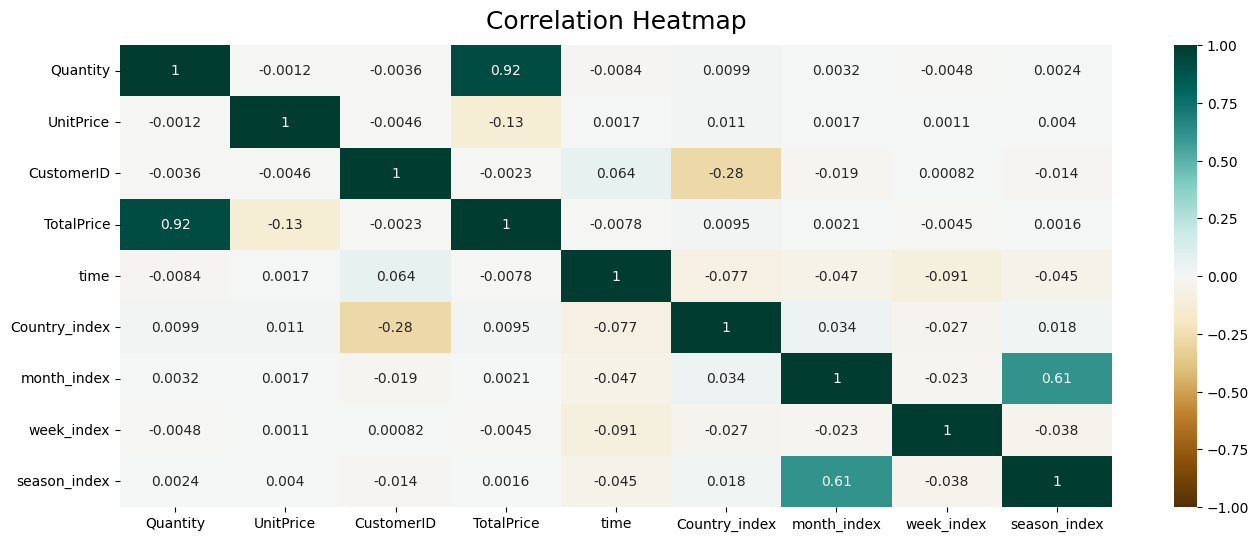

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_pandas_pd.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [ ]:
df_spark.printSchema()

root
 |-- Description: string (nullable = true)
 |-- Quantity: long (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)
 |-- TotalPrice: double (nullable = true)
 |-- date: string (nullable = true)
 |-- month: string (nullable = true)
 |-- week: string (nullable = true)
 |-- time: string (nullable = true)
 |-- season: string (nullable = true)
 |-- row_id: long (nullable = false)



In [ ]:
import pyspark.sql.functions as F

df_spark = df_spark.withColumn("TotalPrice", F.col("Quantity") * F.col("UnitPrice"))
customer_total_payment = df_spark.groupBy("CustomerID").agg(F.sum("TotalPrice").alias("TotalPayment"))
customer_total_payment_ordered = customer_total_payment.orderBy("TotalPayment", ascending=False)
customer_total_payment_ordered.show()

+----------+------------------+
|CustomerID|      TotalPayment|
+----------+------------------+
|   14646.0| 279489.0199999992|
|   18102.0|256438.48999999993|
|   17450.0|187482.16999999998|
|   14911.0|132572.62000000002|
|   12415.0| 123725.4499999999|
|   14156.0|113384.14000000004|
|   17511.0| 88125.37999999996|
|   16684.0| 65892.07999999999|
|   13694.0|62653.100000000006|
|   15311.0|59419.340000000084|
|   13089.0| 57385.88000000011|
|   14096.0| 57120.90999999968|
|   15061.0| 54228.73999999999|
|   17949.0|52750.840000000004|
|   15769.0|          51823.72|
|   16029.0|50992.609999999964|
|   14298.0|  50862.4399999999|
|   14088.0| 50415.48999999999|
|   17841.0| 40340.78000000022|
|   13798.0|36351.419999999984|
+----------+------------------+
only showing top 20 rows



In [ ]:
df_spark = df_spark.na.drop(subset="InvoiceDate")
df_spark = df_spark.na.drop(subset="CustomerID")
df_spark = df_spark.na.drop(subset="UnitPrice")

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import datetime as dt

today_date = dt.datetime(2012, 4, 22).date()

In [ ]:
from pyspark.sql import functions as F

df_last_invoice = df_spark.groupBy("CustomerID").agg(F.max("InvoiceDate").alias("last_invoice_date"))
df_last_invoice.show()

+----------+-------------------+
|CustomerID|  last_invoice_date|
+----------+-------------------+
|   16916.0|2011-11-16 12:08:00|
|   17884.0|2011-12-06 11:33:00|
|   13094.0|2011-11-18 14:07:00|
|   16596.0|2011-11-24 10:02:00|
|   17633.0|2011-11-08 13:25:00|
|   18114.0|2011-02-22 13:20:00|
|   13973.0|2011-02-25 15:21:00|
|   14473.0|2011-09-26 15:10:00|
|   13956.0|2011-12-04 13:20:00|
|   13533.0|2011-06-10 11:54:00|
|   13918.0|2011-10-21 12:25:00|
|   12493.0|2011-06-27 10:17:00|
|   14285.0|2011-11-18 14:50:00|
|   16858.0|2010-12-08 14:52:00|
|   13649.0|2011-03-28 11:51:00|
|   16656.0|2011-11-17 14:43:00|
|   15160.0|2010-12-17 14:15:00|
|   18277.0|2011-10-12 15:22:00|
|   14760.0|2011-02-18 14:36:00|
|   15397.0|2011-02-23 09:25:00|
+----------+-------------------+
only showing top 20 rows



In [ ]:
df_spark = df_spark.join(df_last_invoice, on="CustomerID", how="left")
df_spark.count()

406829

In [ ]:
df_spark.printSchema()

root
 |-- CustomerID: double (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: long (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- Country: string (nullable = true)
 |-- TotalPrice: double (nullable = true)
 |-- date: string (nullable = true)
 |-- month: string (nullable = true)
 |-- week: string (nullable = true)
 |-- time: string (nullable = true)
 |-- season: string (nullable = true)
 |-- row_id: long (nullable = false)
 |-- last_invoice_date: timestamp (nullable = true)



we will segment clients into two groups based on their purchasing preferences—one group preferring to buy big quantities for low prices and the other group preferring higher quality with less quantity at higher prices.
Assigning each customer to either "Group 1" or "Group 2" based on the segmentation criteria. Where Group 2 represent the customers who prefer high quality products.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, when

customer_stats = df_spark.groupBy('CustomerID').agg(
    avg('Quantity').alias('avg_quantity'),
    avg('UnitPrice').alias('avg_unit_price')
)
customer_stats.describe().show()

+-------+------------------+------------------+------------------+
|summary|        CustomerID|      avg_quantity|    avg_unit_price|
+-------+------------------+------------------+------------------+
|  count|              4372|              4372|              4372|
|   mean|15299.677721866423|22.389287841455918| 7.978607822561685|
| stddev|1722.3907054276908| 213.2574664023018|144.96331549059562|
|    min|           12346.0|            -144.0|               0.0|
|    max|           18287.0|           12540.0| 8055.779999999999|
+-------+------------------+------------------+------------------+



In [ ]:
low_price_threshold = 100
high_quality_threshold = 50

In [ ]:
customer_stats = customer_stats.withColumn(
    'Segment',
    when((customer_stats['avg_quantity'] > high_quality_threshold) &
         (customer_stats['avg_unit_price'] > low_price_threshold), 'Group 2').otherwise('Group 1')
)

In [ ]:
df_with_segment = df_spark.join(customer_stats, on='CustomerID', how='left')

In [ ]:
df_with_segment.show()

+----------+--------------------+--------+-------------------+---------+--------------+------------------+----------+--------+---------+----+------+------+-------------------+-----------------+------------------+-------+
|CustomerID|         Description|Quantity|        InvoiceDate|UnitPrice|       Country|        TotalPrice|      date|   month|     week|time|season|row_id|  last_invoice_date|     avg_quantity|    avg_unit_price|Segment|
+----------+--------------------+--------+-------------------+---------+--------------+------------------+----------+--------+---------+----+------+------+-------------------+-----------------+------------------+-------+
|   17850.0|white hanging hea...|       6|2010-12-01 08:26:00|     2.55|United Kingdom|15.299999999999999|12/01/2010|December|Wednesday|  08|Winter|     0|2011-02-10 14:38:00|5.426282051282051|3.9247115384615325|Group 1|
|   17850.0| white metal lantern|       6|2010-12-01 08:26:00|     3.39|United Kingdom|             20.34|12/01/2010

In [ ]:
if "last_invoice_date" in df_with_segment.columns:
  df = df_with_segment.drop("last_invoice_date")  # Remove the duplicate column


In [ ]:
df = df.join(df_last_invoice, on="CustomerID", how="left")
df.count()

406829

In [ ]:
df.show()

+----------+--------------------+--------+-------------------+---------+--------------+------------------+----------+--------+---------+----+------+------+-----------------+------------------+-------+-------------------+
|CustomerID|         Description|Quantity|        InvoiceDate|UnitPrice|       Country|        TotalPrice|      date|   month|     week|time|season|row_id|     avg_quantity|    avg_unit_price|Segment|  last_invoice_date|
+----------+--------------------+--------+-------------------+---------+--------------+------------------+----------+--------+---------+----+------+------+-----------------+------------------+-------+-------------------+
|   17850.0|white hanging hea...|       6|2010-12-01 08:26:00|     2.55|United Kingdom|15.299999999999999|12/01/2010|December|Wednesday|  08|Winter|     0|5.426282051282051|3.9247115384615325|Group 1|2011-02-10 14:38:00|
|   17850.0| white metal lantern|       6|2010-12-01 08:26:00|     3.39|United Kingdom|             20.34|12/01/2010

In [ ]:
!pip3 install http://h2o-release.s3.amazonaws.com/h2o/rel-zz_kurka/2/Python/h2o-3.40.0.2-py2.py3-none-any.whl
import h2o
h2o.init(nthreads = -1, max_mem_size = 8)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 57.1 MB/s eta 0:00:00
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0y2nlwsr
  JVM stdout: /tmp/tmp0y2nlwsr/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0y2nlwsr/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,1 year and 2 months
H2O_cluster_name:,H2O_from_python_unknownUser_2mokac
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:

df.toPandas().to_csv("Edited_file.csv", index=False)



In [ ]:
data = h2o.import_file("/content/Edited_file.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data.head()

CustomerID,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice,date,month,week,time,season,row_id,avg_quantity,avg_unit_price,Segment,last_invoice_date
16916,english rose spirit level,1,2010-12-02 13:14:00,1.95,United Kingdom,1.95,2010-12-02 00:00:00,December,Thursday,13,Winter,2810,3.07692,2.22042,Group 1,2011-11-16 12:08:00
16916,small square cut glass candlestick,2,2010-12-02 13:14:00,4.95,United Kingdom,9.9,2010-12-02 00:00:00,December,Thursday,13,Winter,2811,3.07692,2.22042,Group 1,2011-11-16 12:08:00
16916,ladybird + bee raffia food cover,1,2010-12-02 13:14:00,3.75,United Kingdom,3.75,2010-12-02 00:00:00,December,Thursday,13,Winter,2812,3.07692,2.22042,Group 1,2011-11-16 12:08:00
16916,small heart measuring spoons,1,2010-12-02 13:14:00,0.85,United Kingdom,0.85,2010-12-02 00:00:00,December,Thursday,13,Winter,2813,3.07692,2.22042,Group 1,2011-11-16 12:08:00
16916,paper chain kit 50's christmas,1,2010-12-02 13:14:00,2.95,United Kingdom,2.95,2010-12-02 00:00:00,December,Thursday,13,Winter,2814,3.07692,2.22042,Group 1,2011-11-16 12:08:00
16916,box of 24 cocktail parasols,1,2010-12-02 13:14:00,0.42,United Kingdom,0.42,2010-12-02 00:00:00,December,Thursday,13,Winter,2815,3.07692,2.22042,Group 1,2011-11-16 12:08:00
16916,set of 3 butterfly cookie cutters,1,2010-12-02 13:14:00,1.25,United Kingdom,1.25,2010-12-02 00:00:00,December,Thursday,13,Winter,2816,3.07692,2.22042,Group 1,2011-11-16 12:08:00
16916,36 pencils tube skulls,1,2010-12-02 13:14:00,1.25,United Kingdom,1.25,2010-12-02 00:00:00,December,Thursday,13,Winter,2817,3.07692,2.22042,Group 1,2011-11-16 12:08:00
16916,camouflage led torch,6,2010-12-02 13:14:00,1.69,United Kingdom,10.14,2010-12-02 00:00:00,December,Thursday,13,Winter,2818,3.07692,2.22042,Group 1,2011-11-16 12:08:00
16916,plasters in tin skulls,1,2010-12-02 13:14:00,1.65,United Kingdom,1.65,2010-12-02 00:00:00,December,Thursday,13,Winter,2819,3.07692,2.22042,Group 1,2011-11-16 12:08:00


In [ ]:
y = "Segment"
x = data.names

In [ ]:

x.remove(y)
train, test = data.split_frame([0.8])

In [ ]:

m = h2o.estimators.deeplearning.H2ODeepLearningEstimator(auc_type = "MACRO_OVR" )
m.train(x, y, train)


deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1715346154206_1


Status of Neuron Layers: predicting Segment, 2-class classification, bernoulli distribution, CrossEntropy loss, 834,602 weights/biases, 9.7 MB, 245,203 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate           rate_rms             momentum    mean_weight              weight_rms            mean_bias                bias_rms
--  -------  -------  ---------  ---------  ----  ----  ------------------  -------------------  ----------  -----------------------  --------------------  -----------------------  ---------------------
    1        3969     Input      0.0
    2        200      Rectifier  0.0        0.0   0.0   1.0013330722014595  0.05022810399532318  0.0         -1.1864479245706432e-05  0.022721610963344574  0.5005427490546438       0.02346912771463394
    3        200      Rectifier  0.0        0.0   0.0   0.9738662054221174  0.16970902681350708  0.0         -0.0007085113136752795   0.06920942664146423   0.9992820240608249       0.005631601437926292
    4        2        Softmax               0.0   0.0   0.9739034733886365  0.16352880001068115  0.0         0.03221767878290848      0.3949671983718872    -1.5917358351880617e-05  0.0007136252243071795

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.00021584687906339017
RMSE: 0.01469172825311543
LogLoss: 0.00144181163296338
Mean Per-Class Error: 0.00010036130068245685
AUC: 0.9997992773986351
AUCPR: 0.3068528194400547
Gini: 0.9995985547972701

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0009037294438483626
         Group 1    Group 2    Error    Rate
-------  ---------  ---------  -------  ------------
Group 1  9962       2          0.0002   (2.0/9964.0)
Group 2  0          2          0        (0.0/2.0)
Total    9962       4          0.0002   (2.0/9966.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.000903729  0.666667  3
max f2                       0.000903729  0.833333  3
max f0point5                 0.000903729  0.555556  3
max accuracy                 0.000903729  0.999799  3
max precision                0.000903729  0.5       3
max recall                   0.000903729  1         3
max specificity              0.393725     0.9999    0
max absolute_mcc             0.000903729  0.707036  3
max min_per_class_accuracy   0.000903729  0.999799  3
max mean_per_class_accuracy  0.000903729  0.9999    3
max tns                      0.393725     9963      0
max fns                      0.393725     2         0
max fps                      2.0198e-09   9964      399
max tps                      0.000903729  2         3
max tnr                      0.393725     0.9999    0
max fnr                      0.393725     1         0
max fpr                      2.0198e-09   1         399
max tpr                      0.000903729  1         3

Gains/Lift Table: Avg response rate:  0.02 %, avg score:  0.00 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain    cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  ------  -----------------  --------------------
1        0.0100341                   3.36406e-07        99.66   99.66              0.02             0.00401188   0.02                        0.00401188          1               1                          9866    9866               0.990165
2        0.0200682                   2.45622e-07        0       49.83              0     

In [ ]:
p = m.predict(test)
p.head()


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict,Group 1,Group 2
Group 1,1,2.43761e-08
Group 1,1,3.24415e-08
Group 1,1,3.12588e-08
Group 1,1,2.74102e-08
Group 1,1,3.33112e-08
Group 1,1,3.68135e-08
Group 1,1,2.55857e-08
Group 1,1,3.04575e-08
Group 1,1,2.45461e-08
Group 1,1,3.23648e-08


In [ ]:
print(m.model_performance(test))

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 6.153406014658903e-05
RMSE: 0.007844364865722975
LogLoss: 0.00048821661376542024
Mean Per-Class Error: 0.2000061608980125
AUC: 0.9999556415343099
AUCPR: 0.4612385437723089
Gini: 0.9999112830686199

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0005106600906483747
         Group 1    Group 2    Error    Rate
-------  ---------  ---------  -------  -------------
Group 1  81156      1          0        (1.0/81157.0)
Group 2  2          3          0.4      (2.0/5.0)
Total    81158      4          0        (3.0/81162.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.00051066   0.666667  3
max f2                       0.000101114  0.757576  12
max f0point5                 0.00051066   0.714286  3
max accuracy                 0.00051066   0.999963  3
max 

In [ ]:
rf_fit1 = h2o.estimators.random_forest.H2ORandomForestEstimator(model_id='rf_fit1',keep_cross_validation_predictions=True,nfolds = 5, auc_type ="MACRO_OVR")
rf_fit1.train(x, y, train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_fit1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          10284                  2            11           5.76          3             33            11.58

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 3.839108293652223e-06
RMSE: 0.001959364257521358
LogLoss: 2.6566109014115046e-05
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6666666666666667
         Group 1    Group 2    Error    Rate
-------  ---------  ---------  -------  --------------
Group 1  325630     0          0        (0.0/325630.0)
Group 2  0          37         0        (0.0/37.0)
Total    325630     37         0        (0.0/325667.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.666667     1         25
max f2                       0.666667     1         25
max f0point5                 0.666667     1         25
max accuracy                 0.666667     1         25
max precision                1            1         0
max recall                   0.666667     1         25
max specificity              1            1         0
max absolute_mcc             0.666667     1         25
max min_per_class_accuracy   0.666667     1         25
max mean_per_class_accuracy  0.666667     1         25
max tns                      1            325630    0
max fns                      1            31        0
max fps                      0            325630    51
max tps                      0.666667     37        25
max tnr                      1            1         0
max fnr                      1            0.837838  0
max fpr                      0            1         51
max tpr                      0.666667     1         25

Gains/Lift Table: Avg response rate:  0.01 %, avg score:  0.01 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain    cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  ------  -----------------  --------------------
1        1                           0                  1       1                  0.000113613      0.000109736  0.000113613                 0.000109736         1               1                          0       0                  0

ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 4.6329130133052375e-06
RMSE: 0.0021524202687452183
LogLoss: 3.224495481023348e-05
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7
         Group 1    Group 2    Error    Rate
-------  ---------  ---------  -------  --------------
Group 1  325630     0          0        (0.0/325630.0)
Group 2  0          37         0        (0.0/37.0)
Total    325630     37         0        (0.0/325667.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.7          1         19
max f2                       0.7          1         19
max f0point5                 0.7          1         19
max accuracy                 0.7          1        

In [ ]:

rf_fit1.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,avg_unit_price,762.815918,1.000000,0.560000
1,avg_quantity,272.175293,0.356803,0.199810
2,CustomerID,75.393463,0.098836,0.055348
3,last_invoice_date,70.568985,0.092511,0.051806
4,month,27.842697,0.036500,0.020440
5,Quantity,22.179523,0.029076,0.016282
6,date,21.996326,0.028836,0.016148
7,week,19.494736,0.025556,0.014312
8,TotalPrice,18.290892,0.023978,0.013428
9,UnitPrice,17.341467,0.022733,0.012731


In [ ]:

rf_fit1.cross_validation_predictions()

[predict      Group 1      Group 2
---------  ---------  -----------
Group 1            0  0
Group 1            0  0
Group 1            1  1.21593e-07
Group 1            0  0
Group 1            0  0
Group 1            0  0
Group 1            0  0
Group 1            1  1.21593e-07
Group 1            0  0
Group 1            0  0
[325667 rows x 3 columns]
,
 predict      Group 1      Group 2
---------  ---------  -----------
Group 1     0         0
Group 1     0         0
Group 1     0         0
Group 1     0         0
Group 1     0.999999  7.29561e-07
Group 1     0         0
Group 1     0         0
Group 1     0         0
Group 1     0         0
Group 1     0.999999  7.29561e-07
[325667 rows x 3 columns]
,
 predict      Group 1    Group 2
---------  ---------  ---------
Group 1            1          0
Group 1            0          0
Group 1            0          0
Group 1            0          0
Group 1            0          0
Group 1            1          0
Group 1            0         

In [ ]:

rf_fit1.cross_validation_holdout_predictions()

predict,Group 1,Group 2
Group 1,1,0
Group 1,1,1.2e-07
Group 1,1,1.2e-07
Group 1,1,1.2e-07
Group 1,0.999999,7.3e-07
Group 1,1,0
Group 1,1,0
Group 1,1,1.2e-07
Group 1,1,0
Group 1,0.999999,7.3e-07


In [ ]:
predictions = rf_fit1.predict(test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,Group 1,Group 2
Group 1,1,0
Group 1,1,0
Group 1,1,0
Group 1,1,0
Group 1,1,0
Group 1,1,0
Group 1,1,0
Group 1,1,0
Group 1,1,0
Group 1,1,0


In [ ]:
print(rf_fit1.model_performance(test))

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 1.1350139228892434e-06
RMSE: 0.0010653703219487781
LogLoss: 1.713049673131749e-05
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8
         Group 1    Group 2    Error    Rate
-------  ---------  ---------  -------  -------------
Group 1  81157      0          0        (0.0/81157.0)
Group 2  0          5          0        (0.0/5.0)
Total    81157      5          0        (0.0/81162.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       0.8          1        3
max f2                       0.8          1        3
max f0point5                 0.8          1        3
max accuracy                 0.8          1        3
max precision                0.98         1        0
max recall                   0.8          1 

In [ ]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OGradientBoostingEstimator

gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}

# Train and validate a random grid of GBMs
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator(auc_type ="MACRO_OVR"),
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)

In [ ]:
gbm_grid2.train(x=x, y=y,
                training_frame=train,
                ntrees=100,
                seed=1)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,logloss
,0.6000000,0.1,4.0,1.0,gbm_grid2_model_22,0.0000000
,0.5,0.1,9.0,1.0,gbm_grid2_model_7,0.0000000
,0.9,0.1,4.0,0.7000000,gbm_grid2_model_15,0.0000000
,0.5,0.1,4.0,0.8,gbm_grid2_model_33,0.0000000
,0.6000000,0.09,3.0,0.9,gbm_grid2_model_18,0.0000000
,0.9,0.09,8.0,0.9,gbm_grid2_model_36,0.0000000
,0.6000000,0.09,2.0,0.8,gbm_grid2_model_19,0.0000000
,0.6000000,0.09,3.0,0.8,gbm_grid2_model_1,0.0000000
,0.9,0.09,9.0,0.6000000,gbm_grid2_model_3,0.0000000
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,0.0000000


In [ ]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf2

,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,auc
,0.6000000,0.09,3.0,0.8,gbm_grid2_model_1,1.0
,1.0,0.01,2.0,0.7000000,gbm_grid2_model_10,1.0
,0.6000000,0.01,9.0,0.8,gbm_grid2_model_11,1.0
,0.7000000,0.06,5.0,0.6000000,gbm_grid2_model_14,1.0
,0.9,0.1,4.0,0.7000000,gbm_grid2_model_15,1.0
,0.9,0.07,4.0,0.9,gbm_grid2_model_17,1.0
,0.6000000,0.09,3.0,0.9,gbm_grid2_model_18,1.0
,0.6000000,0.09,2.0,0.8,gbm_grid2_model_19,1.0
,0.5,0.05,7.0,0.9,gbm_grid2_model_2,1.0
,0.3000000,0.02,2.0,1.0,gbm_grid2_model_20,1.0


In [ ]:
gbm_grid2

,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,logloss
,0.6000000,0.1,4.0,1.0,gbm_grid2_model_22,0.0000000
,0.5,0.1,9.0,1.0,gbm_grid2_model_7,0.0000000
,0.9,0.1,4.0,0.7000000,gbm_grid2_model_15,0.0000000
,0.5,0.1,4.0,0.8,gbm_grid2_model_33,0.0000000
,0.6000000,0.09,3.0,0.9,gbm_grid2_model_18,0.0000000
,0.9,0.09,8.0,0.9,gbm_grid2_model_36,0.0000000
,0.6000000,0.09,2.0,0.8,gbm_grid2_model_19,0.0000000
,0.6000000,0.09,3.0,0.8,gbm_grid2_model_1,0.0000000
,0.9,0.09,9.0,0.6000000,gbm_grid2_model_3,0.0000000
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,0.0000000


In [ ]:
print(gbm_grid2.model_performance(test))

{'gbm_grid2_model_22': H2OBinomialModelMetrics({'_metric_json': {'__meta': {'schema_version': 3, 'schema_name': 'ModelMetricsBinomialV3', 'schema_type': 'ModelMetricsBinomial'}, 'model': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'gbm_grid2_model_22', 'type': 'Key<Model>', 'URL': '/3/Models/gbm_grid2_model_22'}, 'model_checksum': 6077863589086177841, 'frame': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_4_sid_8f14', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_4_sid_8f14'}, 'frame_checksum': -7387182095329455119, 'description': None, 'model_category': 'Binomial', 'scoring_time': 1715354560378, 'predictions': None, 'MSE': 2.660323938317903e-17, 'RMSE': 5.157832818459613e-09, 'nobs': 81162, 'custom_metric_name': None, 'custom_metric_value': 0.0, 'r2': 0.9999999999995681, 'logloss': 5.1576739546916006e-09, 'AUC': 1.0, 'pr_auc': 1.0, 'Gini': 1.0, 'mean_per_class_error': 0.0, 'd

In [ ]:
from h2o.automl import H2OAutoML
from h2o.frame import H2OFrame


aml = H2OAutoML(max_models=5, seed=1)

In [ ]:
aml.train(x, y, train)


AutoML progress: |██████
13:45:33.810: GLM_1_AutoML_1_20240510_134044 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException: Index 3861 out of bounds for length 3861

█████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20240510_134044


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    22                 22                          4505                   2            13           5.90909       3             33            11.6818

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 5.077478969531889e-06
RMSE: 0.002253326201314823
LogLoss: 2.824413262030226e-05
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5714285714285714
         Group 1    Group 2    Error    Rate
-------  ---------  ---------  -------  --------------
Group 1  325618     0          0        (0.0/325618.0)
Group 2  0          37         0        (0.0/37.0)
Total    325618     37         0        (0.0/325655.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.571429     1         13
max f2                       0.571429     1         13
max f0point5                 0.571429     1         13
max accuracy                 0.571429     1         13
max precision                1            1         0
max recall                   0.571429     1         13
max specificity              1            1         0
max absolute_mcc             0.571429     1         13
max min_per_class_accuracy   0.571429     1         13
max mean_per_class_accuracy  0.571429     1         13
max tns                      1            325618    0
max fns                      1            16        0
max fps                      0            325618    58
max tps                      0.571429     37        13
max tnr                      1            1         0
max fnr                      1            0.432432  0
max fpr                      0            1         58
max tpr                      0.571429     1         13

Gains/Lift Table: Avg response rate:  0.01 %, avg score:  0.01 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain    cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  ------  -----------------  --------------------
1        1                           0                  1       1                  0.000113613      0.000117787  0.000113613                 0.000117787         1               1                          0       0                  0

ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 2.6342450573073925e-06
RMSE: 0.0016230357535517795
LogLoss: 2.088508310345583e-05
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.72
         Group 1    Group 2    Error    Rate
-------  ---------  ---------  -------  --------------
Group 1  325630     0          0        (0.0/325630.0)
Group 2  0          37         0        (0.0/37.0)
Total    325630     37         0        (0.0/325667.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.72         1         12
max f2                       0.72         1         12
max f0point5                 0.72         1         12
max accuracy              

In [ ]:
gbm_regressor = H2OGradientBoostingEstimator(distribution="bernoulli",
          ntrees=10, max_depth=3, min_rows=2, learn_rate=0.2)

In [ ]:
gbm_regressor.train(x, y,train)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1715346154206_4339


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    10                 10                          948                    2            2            2             3             3             3

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 2.3638502433481347e-10
RMSE: 1.537481786346796e-05
LogLoss: 1.5374062642902088e-05
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0
         Group 1    Group 2    Error    Rate
-------  ---------  ---------  -------  --------------
Group 1  325630     0          0        (0.0/325630.0)
Group 2  0          37         0        (0.0/37.0)
Total    325630     37         0        (0.0/325667.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       1            1        0
max f2                       1            1        0
max f0point5                 1            1        0
max accuracy                 1            1        0
max precision                1            1        0
max recall                   1            1        0
max specificity              1            1        0
max absolute_mcc             1            1        0
max min_per_class_accuracy   1            1        0
max mean_per_class_accuracy  1            1        0
max tns                      1            325630   0
max fns                      1            0        0
max fps                      1.53757e-05  325630   1
max tps                      1            37       0
max tnr                      1            1        0
max fnr                      1            0        0
max fpr                      1.53757e-05  1        1
max tpr                      1            1        0

Gains/Lift Table: Avg response rate:  0.01 %, avg score:  0.01 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain    cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  ------  -----------------  --------------------
1        1                           1.53757e-05        1       1                  0.000113613      0.000128987  0.000113613                 0.000128987         1               1                          0       0                  0

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_logloss    training_auc    training_pr_auc    training_lift    training_classification_error
--  -------------------  ----------  -----------------  ---------------  ------------------  --------------  -----------------  ---------------  -------------------------------
    2024-05-10 14:58:43  0.053 sec   0                  0.0106583        0.00114552          0.5             0.000113613        1                0.999886
    2024-05-10 14:58:44  1.347 sec   1                  9.30129e-05      9.3012e-05          1               1                  1                0
    2024-05-10 14:58:45  2.331 sec   2                  7.61524e-05      7.6151e-05          1               1                  1                0
    2024-05-10 14:58:46  3.441 sec   3                  6.23482e-05      6.23466e-05         1               1              

In [ ]:
predictions3 = gbm_regressor.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
predictions3


predict,Group 1,Group 2
Group 1,0.999985,1.53757e-05
Group 1,0.999985,1.53757e-05
Group 1,0.999985,1.53757e-05
Group 1,0.999985,1.53757e-05
Group 1,0.999985,1.53757e-05
Group 1,0.999985,1.53757e-05
Group 1,0.999985,1.53757e-05
Group 1,0.999985,1.53757e-05
Group 1,0.999985,1.53757e-05
Group 1,0.999985,1.53757e-05


In [ ]:
print(gbm_regressor.model_performance(test))

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 2.3639725592792584e-10
RMSE: 1.5375215638420356e-05
LogLoss: 1.5374860234465057e-05
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0
         Group 1    Group 2    Error    Rate
-------  ---------  ---------  -------  -------------
Group 1  81157      0          0        (0.0/81157.0)
Group 2  0          5          0        (0.0/5.0)
Total    81157      5          0        (0.0/81162.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       1            1        0
max f2                       1            1        0
max f0point5                 1            1        0
max accuracy                 1            1        0
max precision                1            1        0
max recall                   1            